The **double slit experiment** is one of the most fundamental demonstrations of the difference between classical and quantum behavior. In *1803*, **Thomas Young** on his famous paper, "**Experiments and calculations relative to physical optics**", first proposed the famous double slit experiment.

In the classical world, things are either here or there. A ball goes through one hole or the other – simple. But in the quantum world, particles act like waves and can interfere with themselves. It can behave as if it goes through both slits simultaneously. This results in an interference pattern, even when particles are sent one at a time.

In this notebook, we’ll simulate the double slit experiment using **Qiskit**. While we won’t use physical slits or particles, we’ll model the quantum behavior using qubits and quantum gates. This gives us a way to explore how interference and superposition can emerge in a quantum system.

In [1]:
%pip install qiskit
%pip install qiskit-aer

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/9.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.5 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.5 MB ? eta -:--:--
   -- ------------------------------------- 0.5/9.5 MB 1.3 MB/s eta 0:00:08
   --- ------------------------------------ 0.8/9.5 MB 1.5 MB/s eta 0:00:06
   ----- ---------------------------------- 1.3/9.5 MB 1.6 MB/s eta 0:00:06
   ------ --------------------------------- 1.6/9.5 MB 1.7 MB/s eta 0:00:05
   -------- ------------------------------- 2.1/9.5 MB 1.7 MB/s eta 0:00:05
   -------- ------------------------------- 2.1/9.5 MB 1.7 MB/s eta 0:00:05
   -------- ------------------------------- 2.1/9.5 MB 1.7 MB/s eta 0:00:05
   ----------- ------------------------

In [2]:
%pip install pylatexenc

Defaulting to user installation because normal site-packages is not writeable
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136928 sha256=a7c97fbe2bef7a5426e8716d560d4395ae14408673a9e540edb98db7c74cf486
  Stored in directory: c:\users\iiser13\appdata\local\pip\cache\wheels\3c\d9\c1\bb2a15d13c742b9035ef7ae6ebe236af270b1d1d9b386dcd5e
Successfully built pylatexenc
Note: you may need to restart the kernel to use updated packages.


In [4]:
%pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   --- ------------------------------------ 0.8/8.1 MB 5.2 MB/s eta 0:00:02
   --------- ------------------------------ 1.8/8.1 MB 5.3 MB/s eta 0:00:02
   -------------- ------------------------- 2.9/8.1 MB 5.1 MB/s eta 0:00:02
   -------------------- ------------------- 4.2/8.1 MB 5.6 MB/s eta 0:00:01
   --------------------------- ------------ 5.5/8.1 MB 5.6 MB/s eta 0:00:01
   ----------------------------------- ---- 7.1/8.1 MB 5.9 MB/s eta 0:00:01
   ---------------------------------------- 8.1/8.1 MB 5.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ----------------------- ---------------- 1.3/2.2 MB 6.8 MB/s eta 0:00:01
   ---------------------------------------- 2.2/2.2 MB 6.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/7.0 MB ? eta -:--:--
   ------ ---------------------

In [16]:
%pip install qiskit-ibm-runtime

Defaulting to user installation because normal site-packages is not writeable
  Using cached idna-3.10-py3-none-any.whl.metadata (10 kB)
  Using cached certifi-2025.7.14-py3-none-any.whl.metadata (2.4 kB)
   ---------------------------------------- 0.0/3.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/3.2 MB ? eta -:--:--
   --- ------------------------------------ 0.3/3.2 MB ? eta -:--:--
   --- ------------------------------------ 0.3/3.2 MB ? eta -:--:--
   ------ --------------------------------- 0.5/3.2 MB 845.8 kB/s eta 0:00:04
   --------- ------------------------------ 0.8/3.2 MB 885.5 kB/s eta 0:00:03
   ------------- -------------------------- 1.0/3.2 MB 938.6 kB/s eta 0:00:03
   ---------------- ----------------------- 1.3/3.2 MB 963.7 kB/s eta 0:00:02
   ---------------- ----------------------- 1.3/3.2 MB 963.7 kB/s eta 0:00:02
   ------------------- -------------------- 1.6/3.2 MB 992.8 kB/s eta 0:00:02
   -------------------------- ------------- 2.1/3.2

In [17]:
import numpy as np
import matplotlib.pyplot as plt

from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.circuit import Parameter
from qiskit.visualization import plot_histogram, plot_distribution
from qiskit.result import marginal_distribution
from qiskit_ibm_runtime import Options, Session, SamplerV2 as Sampler
from qiskit_ibm_runtime import QiskitRuntimeService

from qiskit.transpiler import generate_preset_pass_manager
from qiskit_aer import AerSimulator

import pylatexenc

In [18]:
particle = QuantumRegister(1, name='particle')
screen = ClassicalRegister(1, name='screen')

In [19]:
theta = Parameter('θ')

In [20]:
double_slit = QuantumCircuit(particle, screen)
double_slit.h(particle)
double_slit.barrier()
double_slit.p(theta, particle)
double_slit.barrier()
double_slit.h(particle)

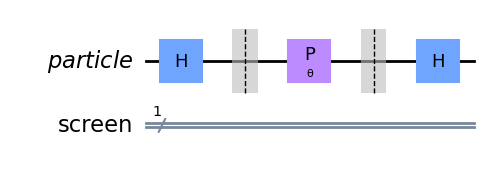

In [21]:
double_slit.draw('mpl', style = 'clifford')

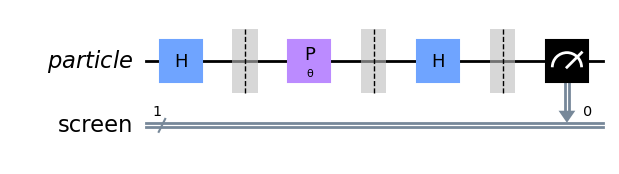

In [22]:
double_slit.barrier()
double_slit.measure(particle, screen)
double_slit.draw('mpl', style = 'clifford')

In [23]:
backend = AerSimulator()
sampler = Sampler(mode=backend)

In [24]:
theta_list = np.linspace(-4*np.pi, 4*np.pi, 1000)
pm = generate_preset_pass_manager(backend = AerSimulator(), optimization_level=3)
qc_isa = pm.run(double_slit)
dist = sampler.run([(qc_isa, theta_list)], shots = 10000).result()[0].data.screen

probability = []

for i in range(len(theta_list)):
  result = dist[i].get_counts()
  if '0' in result:
    p = result['0']/10000
    probability.append(p)
  else:
    probability.append(0)

print(probability)

[1.0, 0.9998, 0.9992, 0.9988, 0.9976, 0.9966, 0.9948, 0.9938, 0.9896, 0.9868, 0.9855, 0.9807, 0.9767, 0.9751, 0.9683, 0.9641, 0.9619, 0.9532, 0.9509, 0.946, 0.9375, 0.9317, 0.9275, 0.9188, 0.9116, 0.9063, 0.8949, 0.887, 0.8735, 0.8723, 0.8674, 0.8571, 0.8428, 0.8388, 0.8293, 0.8263, 0.8081, 0.7961, 0.7924, 0.7781, 0.7671, 0.7599, 0.7451, 0.7353, 0.7149, 0.7145, 0.6998, 0.6864, 0.6821, 0.6735, 0.6668, 0.6414, 0.6421, 0.6164, 0.6004, 0.5941, 0.5767, 0.5739, 0.5593, 0.5381, 0.5197, 0.5138, 0.507, 0.4992, 0.4845, 0.463, 0.4486, 0.4345, 0.4253, 0.4178, 0.4063, 0.3943, 0.3767, 0.3672, 0.3624, 0.345, 0.3298, 0.3249, 0.2982, 0.2839, 0.2788, 0.2702, 0.2669, 0.2597, 0.2454, 0.2383, 0.2123, 0.2123, 0.1988, 0.1924, 0.1827, 0.1717, 0.166, 0.1613, 0.1482, 0.1386, 0.1244, 0.115, 0.1066, 0.1067, 0.0973, 0.0871, 0.077, 0.0796, 0.0657, 0.0636, 0.0501, 0.0508, 0.0491, 0.0393, 0.0343, 0.029, 0.0245, 0.0206, 0.0186, 0.0144, 0.0121, 0.0122, 0.009, 0.0049, 0.0055, 0.0029, 0.0013, 0.0005, 0, 0, 0.0001, 0.0005

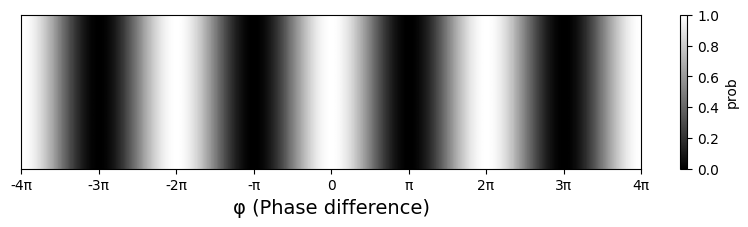

In [25]:
plt.figure(figsize=(10, 2))
probability_2d = np.array(probability).reshape(1, 1000)
plt.imshow(probability_2d, cmap='gray', aspect='auto', extent=[-4*np.pi, 4*np.pi, 0, 1])

plt.xlabel('φ (Phase difference)', fontsize=14)
plt.colorbar(label='prob')
plt.xticks(ticks=[-4*np.pi, -3*np.pi, -2*np.pi, -np.pi, 0, np.pi, 2*np.pi, 3*np.pi, 4*np.pi],
           labels=['-4π', '-3π', '-2π', '-π', '0', 'π', '2π', '3π', '4π'])
plt.yticks([])
plt.show()